### Prédiction des dépenses médicales et analyse des profils de risque à partir de données démographiques et socioéconomiques


## Import des bibliothèques

In [1]:
# ==============================
#  Importation des bibliothèques
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings

# =========================
# Clustering et métriques
# =========================
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import f_oneway

# =========================
# Machine Learning & Préprocessing
# =========================
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance

# =========================
# Réduction de dimension
# =========================
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

# =========================
# Deep Learning / Autoencodeur
# =========================
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# === Style général pour les graphiques ===
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")


## Chargement des données

In [5]:
# ==============================
#  Chargement et exploration des données
# ==============================
 # Lecture du fichier CSV contenant 
df = pd.read_csv("../medical_insurance.csv") 

print("Aperçu des données :")
# Affiche les 10 premières lignes pour un aperçu rapide
display(df.head(10))                        



Aperçu des données :


,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0
5,76435,63,Female,North,Rural,305000.0,HS,Single,Employed,3,...,0,0,0,0,0,0,0,1,1,0
6,84005,36,Male,West,Rural,38900.0,Masters,Single,Employed,1,...,0,0,0,1,0,1,0,1,0,0
7,80918,21,Female,South,Suburban,83700.0,HS,Single,Employed,3,...,0,0,0,2,1,0,0,1,0,1
8,60768,53,Male,North,Suburban,60700.0,No HS,Divorced,Retired,1,...,0,0,0,0,0,1,0,1,1,0
9,50075,28,Male,South,Urban,23600.0,Bachelors,Married,Employed,4,...,0,0,0,0,0,2,0,0,0,0


## Aperçu et nettoyage des données

In [6]:
# Informations générales
df.info()

# Statistiques descriptives
df.describe()

# Vérifier les valeurs manquantes
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

## Analyse exploratoire simple

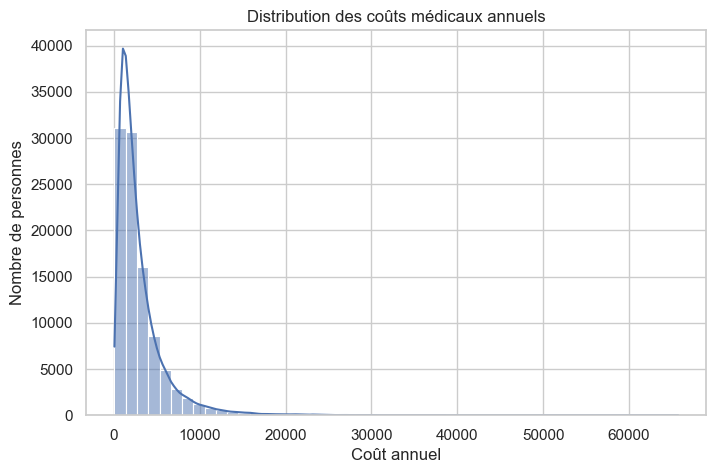

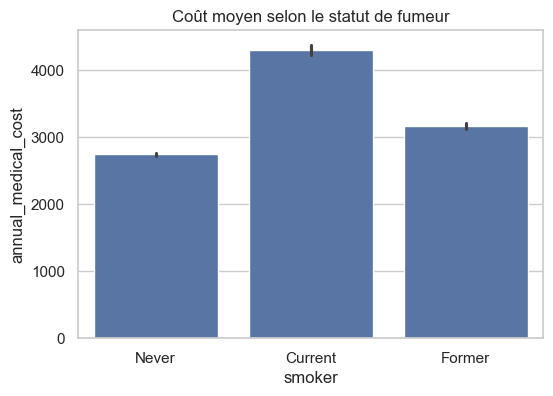

In [7]:
# Distribution des coûts médicaux annuels
plt.figure(figsize=(8,5))
sns.histplot(df['annual_medical_cost'], bins=50, kde=True)
plt.title("Distribution des coûts médicaux annuels")
plt.xlabel("Coût annuel")
plt.ylabel("Nombre de personnes")
plt.show()

# Coût moyen par statut de fumeur
plt.figure(figsize=(6,4))
sns.barplot(x='smoker', y='annual_medical_cost', data=df)
plt.title("Coût moyen selon le statut de fumeur")
plt.show()


## Préparation des données

In [8]:
# Séparer la cible
y = df['annual_medical_cost']
X = df.drop('annual_medical_cost', axis=1)

# Colonnes catégorielles
cat_cols = X.select_dtypes(include='object').columns

# Encoder les colonnes catégorielles
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Normaliser les colonnes numériques
num_cols = X.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

X_encoded.shape


(100000, 72)

## Division train/test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


## Entraînement du modèle FSM

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Prédictions et évaluation

In [26]:
y_pred = model.predict(X_test)

# MSE, RMSE, R²
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error (RMSE) :", rmse)
print("R² Score :", r2)


Mean Squared Error (MSE) : 330464.59278197814
Root Mean Squared Error (RMSE) : 574.860498540279
R² Score : 0.9664167064015345


## Visualisation des performances

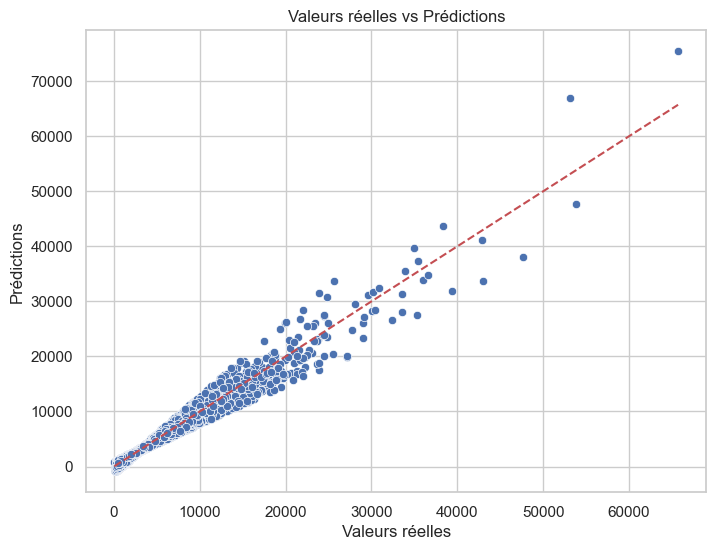

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Valeurs réelles vs Prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


## Feature Importance simple

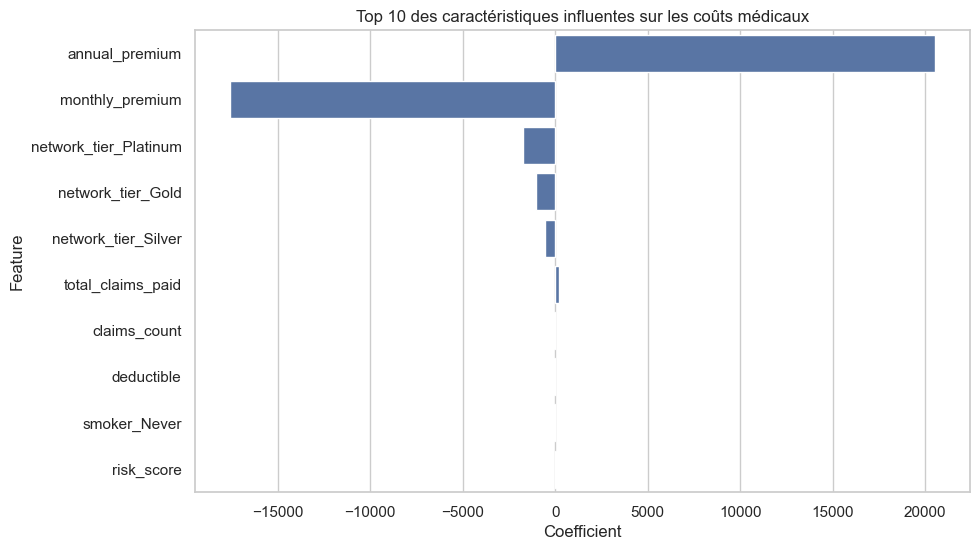

In [28]:
# Coefficients du modèle
coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Top 10 caractéristiques influentes
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10))
plt.title("Top 10 des caractéristiques influentes sur les coûts médicaux")
plt.show()


## Conclusion et utilité

# Conclusion
- Ce modèle simple (FSM) permet de prédire les coûts médicaux annuels avec un R² de {:.2f}.
- Les caractéristiques les plus influentes incluent le statut de fumeur, l'âge, le BMI et le nombre de visites médicales.
- Utilité du projet : 
  - Prévision des coûts d’assurance pour mieux gérer les primes.
  - Identification des patients à haut risque pour la prévention.
  - Aide à la planification des ressources médicales.
